In [3]:
import pandas as pd
import datetime
from datetime import date,timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings

In [5]:
data = pd.read_csv('/content/Histori_Penjualan_Adidas.csv')
data.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [24]:
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


In [7]:
import plotly.express as px
figure = px.line(data, x="Time Period", y="Revenue", title="Pendapatan Penjualan Kuartal")
figure.show()

<Figure size 640x480 with 0 Axes>

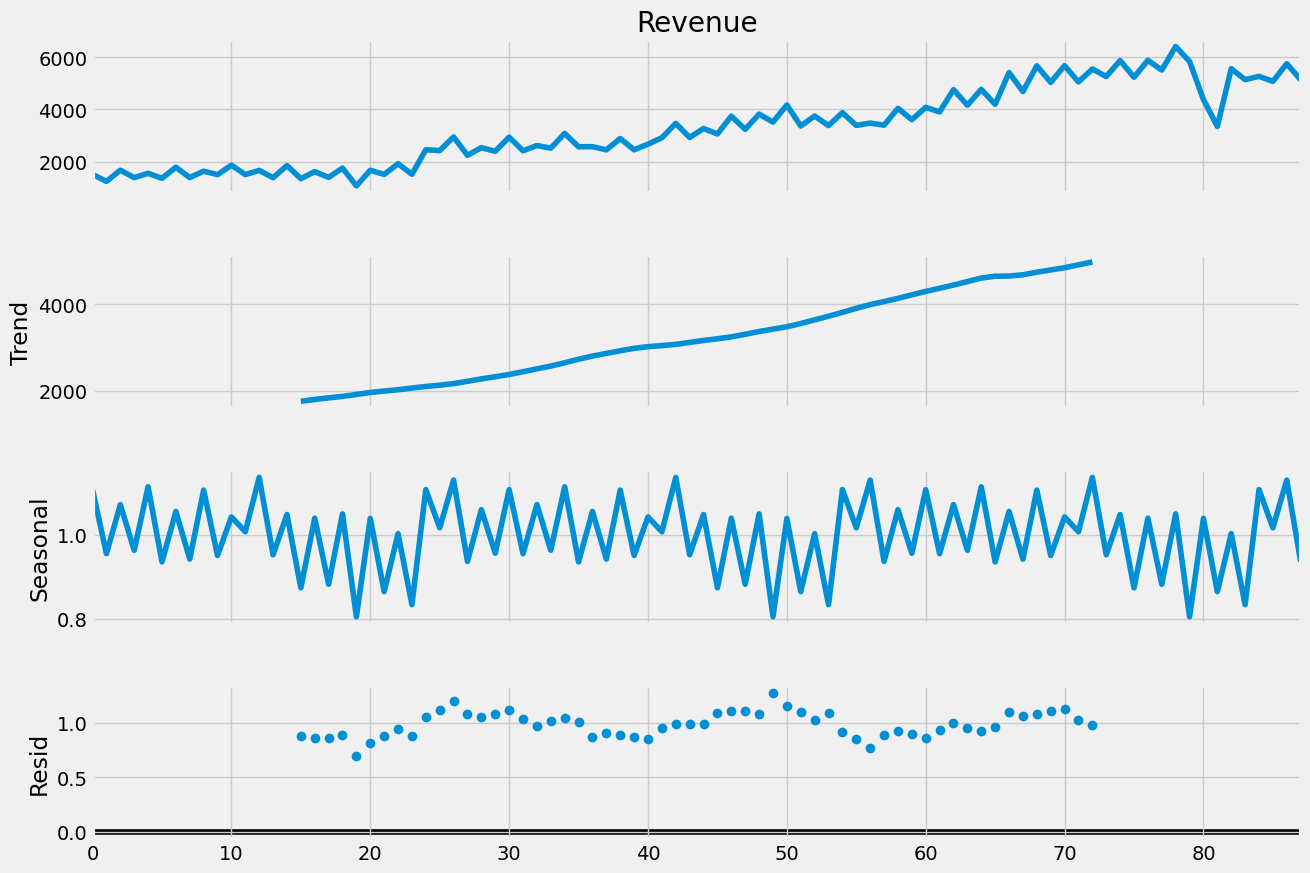

In [13]:
#Pendapatan sifatnya musiman dan naik turun. Jadi, masuk kategori seaonal
#tapi kita cek dulu menggunakan grafik
result = seasonal_decompose(data["Revenue"], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

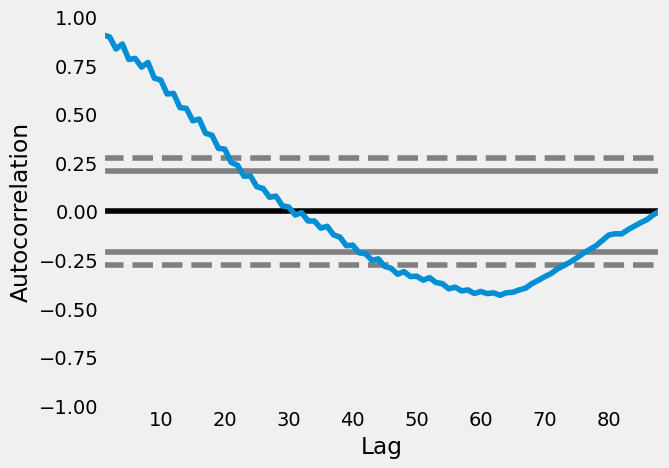

In [14]:
#jadi sudah jelas menggunakan seasonal ARIMA (Musiman)
#maka kita bisa menentukan d - 1
#sekarang kita cari p dan q
#kita cari nilai p dulu menggunakan plot autokorelasi
pd.plotting.autocorrelation_plot(data["Revenue"])

In [15]:
d = 1 #kaerna seasonal
p = 5 #karena memotong 5 gari yang dilewati grafik menurun hingga


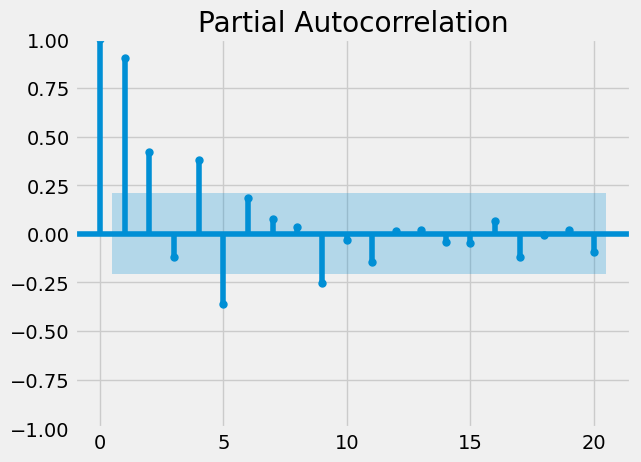

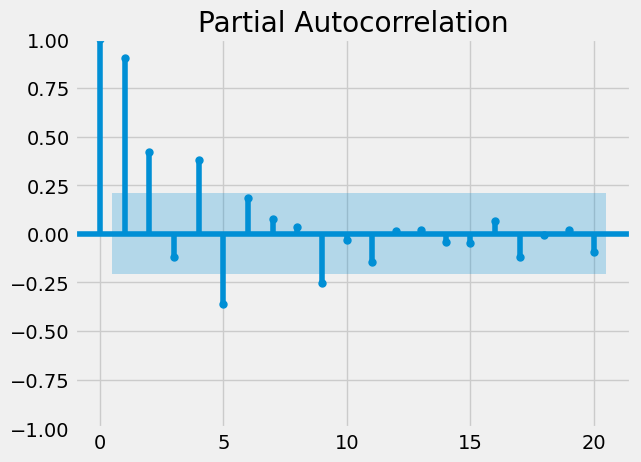

In [16]:
#mencari nilai q menggunakan autocorelation partial
plot_pacf(data["Revenue"],lags=20)

In [17]:
q = 2

In [19]:
#kita mulai membuat model
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore')
model = sm.tsa.statespace.SARIMAX(data["Revenue"],
                                  order=(p,d,q),
                                  seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Fri, 22 Mar 2024   AIC                           1127.041
Time:                                    03:26:49   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5796      0.393     -4.023      0.000      -2.349      -0.810
ar.L2         -1.4321      0.593   

In [25]:
#sekarang mari kita perkirakan pendapatan kuartalan Adidas untuk delapan quartal
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    6078.801793
89    5186.300298
90    6293.206972
91    5751.874973
92    5911.949537
93    5499.819447
94    6389.630872
95    5728.795520
Name: predicted_mean, dtype: float64


<Axes: >

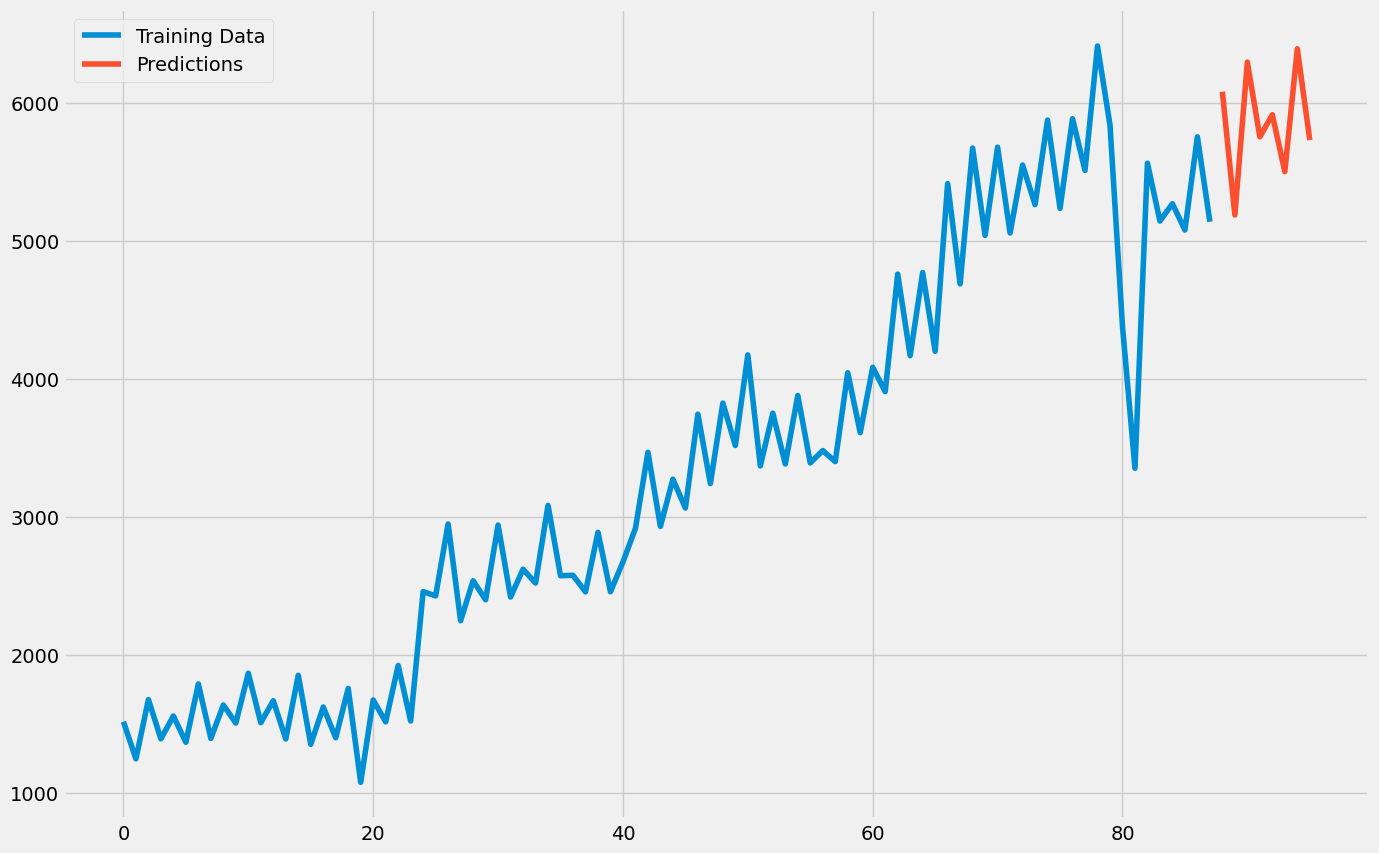

In [23]:
#membuat grafik peramalan agar lebih mudah dilihat dan dipahami
data["Revenue"].plot(legend=True,
                     label="Training Data",
                     figsize=(15,10))
predictions.plot(legend=True, label="Predictions")